In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [177]:
x_data = np.linspace(0, 7, 100)
y_data = 2 + 1 * x_data + np.random.normal(scale=1, size=100)

In [179]:
def hypothesis(theta0, theta1):
    return theta0 + theta1 * x_data

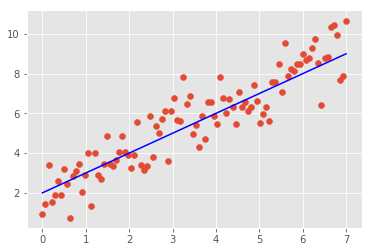

In [180]:
plt.scatter(x_data, y_data)
plt.plot(x_data, hypothesis(2, 1), c='b')

In [192]:
th0 = np.linspace(0, 4, 40)
th1 = np.linspace(0, 2, 40)
th0, th1 = np.meshgrid(th0, th1)

In [193]:
cost_list = np.sum((th0 + th1 * x_data.reshape(100, 1, 1) - y_data.reshape(100, 1, 1)) ** 2, axis=0)

Let's visualize cost function for $\theta_0$ and $\theta_1$ using contour plot.

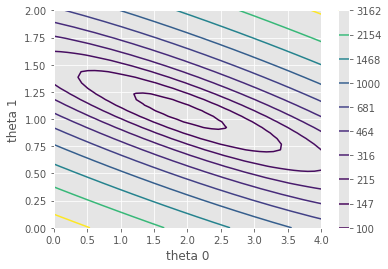

In [194]:
c = plt.contour(th0, th1, cost_list, levels=np.logspace(0, 4, 25))
plt.xlabel("theta 0")
plt.ylabel("theta 1")
plt.colorbar()

pyplot 3d plot

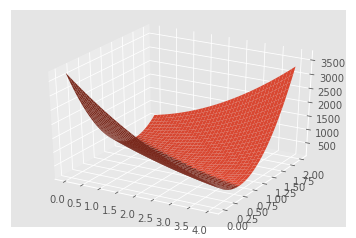

In [195]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(th0, th1, cost_list)
plt.show()

interactive vis.js graph3d plot

In [196]:
from IPython.core.display import display, HTML
import json

def plot3D(X, Y, Z, height=600, xlabel = "X", ylabel = "Y", zlabel = "Z", initialCamera = None):

    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": False,
        "keepAspectRatio": True,
        "height": str(height) + "px",
        "xLabel": xlabel,
        "yLabel": ylabel,
        "zLabel": zlabel
    }

    if initialCamera:
        options["cameraPosition"] = initialCamera

    data = [ {"x": X[y,x], "y": Y[y,x], "z": Z[y,x]} for y in range(X.shape[0]) for x in range(X.shape[1]) ]
    visCode = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "H: " + evt.horizontal + "<br>V: " + evt.vertical + "<br>D: " + evt.distance;
        });
       </script>
    """
    htmlCode = "<iframe srcdoc='"+visCode+"' width='100%' height='" + str(height) + "px' style='border:0;' scrolling='no'> </iframe>"
    display(HTML(htmlCode))

In [197]:
plot3D(th0, th1, cost_list, xlabel="theta0", ylabel="theta1", zlabel="cost")